In [3]:
# import the libraries 

import tensorflow as tf
print(tf.__version__)

2.4.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# to split train and test 

from sklearn.model_selection import train_test_split

In [6]:
# import Tensorflow libraries 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input ,GlobalMaxPool1D
from tensorflow.keras.layers import Conv1D , MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [7]:
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns = ['labels','data']

In [12]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Create binary labels (0 and 1)

df['b_labels']=df['labels'].map({'ham':0,'spam':1})
y = df['b_labels'].values

In [14]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
# split the data 

x_train,x_test,y_train,y_test = train_test_split(df['data'],y,test_size=0.3)

In [16]:
# Convert sentence to sequence 
# bag of words
max_vocab_size = 20000
tokenizer = Tokenizer(num_words =max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_text = tokenizer.texts_to_sequences(x_test)


In [17]:
sequence_train[0]

[3505, 2355, 3506]

In [18]:
len(sequence_train[0])

3

In [19]:
len(sequence_train[1])

12

In [20]:
# vocabulary 

word2idx = tokenizer.word_index
v = len(word2idx)
print('Total number of unique tokens are: %s' %v)

Total number of unique tokens are: 7299


In [21]:
# pad sequences to get N x T matrix 

data_train = pad_sequences(sequence_train)
print('Shape of data train tensor :',data_train.shape)

Shape of data train tensor : (3900, 189)


In [22]:
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [23]:
len(data_train[0])

189

In [24]:
len(data_train[1])

189

In [25]:
# set the value of T to get sequence length 

T = data_train.shape[1]
print(T)

189


In [30]:
# pad sequence to test set

data_test = pad_sequences(sequence_text,maxlen=T)
#maxlen = T to truncate longer sentences in text set 
print('shape of data test tensor',data_text.shape)

shape of data test tensor (1672, 189)


In [27]:
# Building the model

# create the model

# choose embedding dimensionality 
D = 20 # this is a hyper parameter , we can choose any word vector size that we want

# input layer 

i= Input(shape=(T,)) #input layer takes in sequence of integers so shape is T

#Embedding layer 

x = Embedding (v+1,D)(i) # this takes in sequence of integers and returns sequence of word vectors 
# this will be an N x T x D array 
# we want size of embedding to (v+1)xn because first word index starts from 1 and not 0

# First CNN layer 

x= Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)

# second CNN layer 

x= Conv1D(64,3, activation='relu')(x)
x= MaxPooling1D(3)(x)

# Third CNN layer 
x= Conv1D(128,3,activation='relu')(x)
x= GlobalMaxPool1D()(x)

# dense layer 

x = Dense (1,activation='sigmoid')(x)

model =  Model(i,x)


In [28]:
# compile the model

model.compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])

In [31]:
# train the model

r = model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test))

Epoch 1/5
122/122 [==============================] - 3s 20ms/step - loss: 0.4767 - accuracy: 0.8402 - val_loss: 0.2650 - val_accuracy: 0.8714
Epoch 2/5
122/122 [==============================] - 2s 18ms/step - loss: 0.1852 - accuracy: 0.9132 - val_loss: 0.0576 - val_accuracy: 0.9850
Epoch 3/5
122/122 [==============================] - 2s 18ms/step - loss: 0.0185 - accuracy: 0.9955 - val_loss: 0.0666 - val_accuracy: 0.9868
Epoch 4/5
122/122 [==============================] - 2s 18ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0492 - val_accuracy: 0.9886
Epoch 5/5
122/122 [==============================] - 2s 18ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0576 - val_accuracy: 0.9892


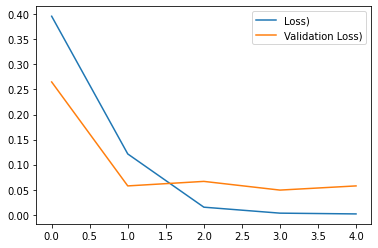

In [32]:
# loss per iteration 

import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='Loss)')
plt.plot(r.history['val_loss'],label='Validation Loss)')
plt.legend()
plt.show()

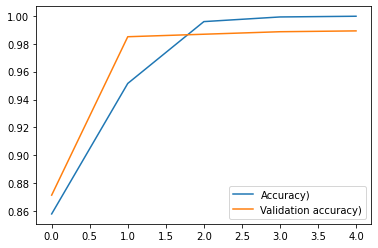

In [33]:
# accuracy per iteration

plt.plot(r.history['accuracy'],label='Accuracy)')
plt.plot(r.history['val_accuracy'],label='Validation accuracy)')
plt.legend()
plt.show()